In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2023-12-10 / Aki Taanila


# Dataframe matplotlib-grafiikaksi - perusasiat

* Jos käytän pandas-kirjastoa, niin voin tehdä kaavion suoraan dataframesta plot-funktiolla. Käytettävissä on monia kaavioon vaikuttavia parametreja: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
* Kaavion luonnin jälkeen voin muotoilla ja täydentää kaaviota **matplotlib.pyplot**-paketin komennoilla. Lue lisää https://matplotlib.org/stable/tutorials/pyplot.html ja https://matplotlib.org/stable/api/pyplot_summary.html
* Joissain tapauksissa tarvitaan kaavion luonnin palauttamaa **Axes**-luokan oliota kaavion muotoiluun. Lue lisää https://matplotlib.org/stable/api/axes_api.html

**Seaborn** on matplotlibin päälle rakennettu paketti, joka tekee monista vaikeista asioista helppoja. Tässä muistiossa en käytä sitä muuuhun kuin grafiikan tyylimäärittelyyn.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Grafiikan tyylimäärittely, joka sisältää taustaviivoitukset (grid)
# Muita tyylivaihtoehtoja ovat 'darkgrid', 'dark', 'white' ja 'ticks'
sns.set_style('whitegrid')

In [3]:
df1 = pd.DataFrame({'Myynti 2017':[1321847, 852669, 1032199, 568230]},
                    index=['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df1

,Myynti 2017
Helsinki,1321847
Turku,852669
Tampere,1032199
Oulu,568230


## Dataframesta kaavioksi

* `df.plot()` luo oletuksena viivakaavion
* **kind**-parametrilla voin määrittää tehtäväksi muun kuin viivakaavion

<Axes: >

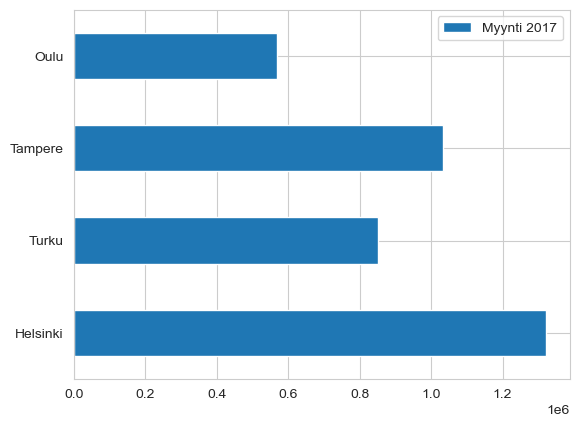

In [4]:
df1.plot(kind='barh')    # Myynnit vaakapylväskaaviona
# Kaaviossa on 'whitegrid'-tyylin tuoma taustaviivoitus; vaakaviivoitus on tässä tarpeeton
# 1e6 kertoo asteikon lukujen olevan miljoonia
# Selitteen (Myynti 2017) voisin käyttää otsikkoa

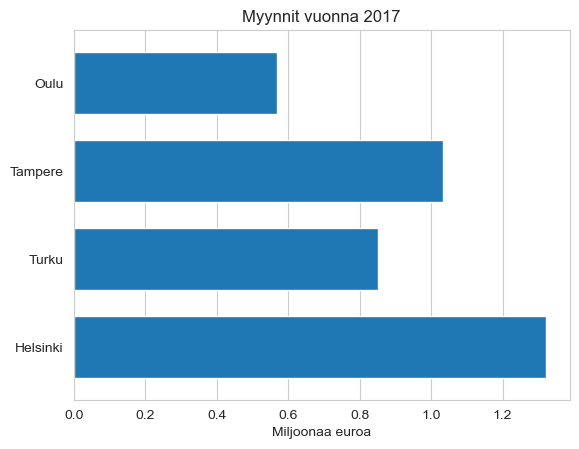

In [5]:
# Selite (legend) piiloon ja pylväiden paksuuden määritys (width)
(df1/1000000).plot(kind='barh', legend=False, width=0.7)

plt.title('Myynnit vuonna 2017')    # Otsikko
plt.xlabel('Miljoonaa euroa')    # Otsikko x-akselille
plt.grid(axis='y')    # Poistan vaakasuuntaisen taustaviivoituksen

In [6]:
df2 = pd.DataFrame({'Myynti 2017':[1321847, 852669, 1032199, 568230],
                    'Myynti 2016':[1203434, 923450, 1023563, 542399]},
                    index=['Helsinki', 'Turku', 'Tampere', 'Oulu'])
df2

,Myynti 2017,Myynti 2016
Helsinki,1321847,1203434
Turku,852669,923450
Tampere,1032199,1023563
Oulu,568230,542399


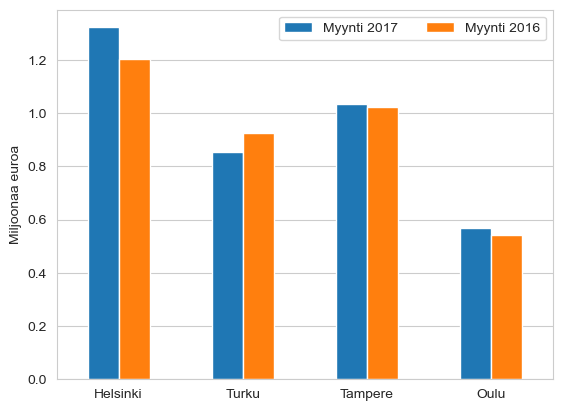

In [7]:
(df2/1000000).plot(kind='bar', rot=0)    # Luokka-akselin nimiöiden asento (rot=0)

plt.ylabel('Miljoonaa euroa')    # y-akselin otsikko
plt.grid(axis='x')    # Poistan pystysuuntaisen taustaviivoituksen
plt.legend(ncol=2)    # Selitteeseen kaksi selitettä vierekkäin

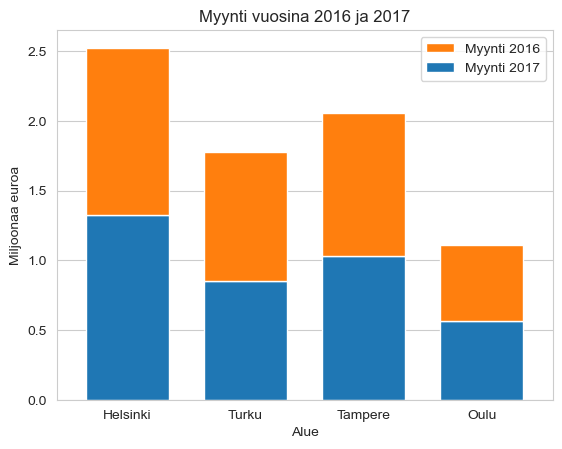

In [8]:
# legend='reverse' kääntää selitteen järjestyksen
# rot=0 määrittää luokka-akselin nimiöiden asennon
# stacked=True pinoaa pylväät päällekkäin
# width=0.7 määrittää pylväiden leveyden (voi olla enintään 1)
(df2/1000000).plot(kind='bar', legend='reverse', rot=0, stacked=True, width=0.7)

plt.title('Myynti vuosina 2016 ja 2017')
plt.xlabel('Alue')
plt.ylabel('Miljoonaa euroa')
plt.grid(axis='x')

In [9]:
df3 = pd.DataFrame({'Mies':[17, 15, 6],'Nainen':[8, 15, 21]},
                    index=['Tyytymätön', 'Ei tyytymätön eikä tyytyväinen', 'Tyytyväinen'])
df3

,Mies,Nainen
Tyytymätön,17,8
Ei tyytymätön eikä tyytyväinen,15,15
Tyytyväinen,6,21


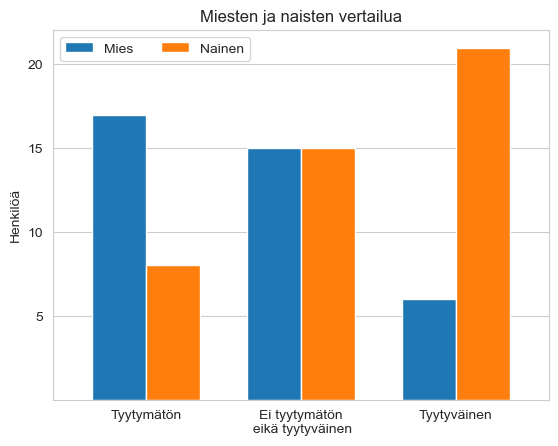

In [10]:
df3.plot(kind='bar', rot=0, width=0.7)

plt.title('Miesten ja naisten vertailua')
plt.ylabel('Henkilöä')
plt.yticks([5, 10, 15, 20])    # y-akselin jakoviivat
plt.grid(axis='x')
plt.legend(ncol=2)

# Määrittelen luokka-akselin nimiöt, jotta voin lisätä rivinvaihdon (\n) haluamaani kohtaan
plt.xticks([0, 1, 2], ['Tyytymätön', 'Ei tyytymätön\n eikä tyytyväinen', 'Tyytyväinen'])

# Tallennan kaavion tai tarkkaan ottaen tallenna kuvion (figure), jonka sisällä kaavio on
# Kuvioon (figure) pääsen käsiksi plt.gcf-funktiolla (get current figure)
# Ilman parametria bbox_inches='tight' kuvion reunoilta voi jäädä osia tallentumatta
plt.gcf().savefig('testi.png', bbox_inches='tight')

In [11]:
# Tarjolla olevat kuvion tallennusmuodot
plt.figure().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format',
 'webp': 'WebP Image Format'}

<Figure size 640x480 with 0 Axes>

## Usean kaavion kuviot

* Kaavio (**Axes**-luokan olio) on aina **Figure** (kuvio) -luokan olion sisällä 
* **Figure**-olion sisään voin sijoittaa useita kaavioita **plt.subplots**-funktiolla
* **plt.subplots** palauttaa sekä kuvio-olion (**fig**) että listan kaavio-olioista (**axs**)

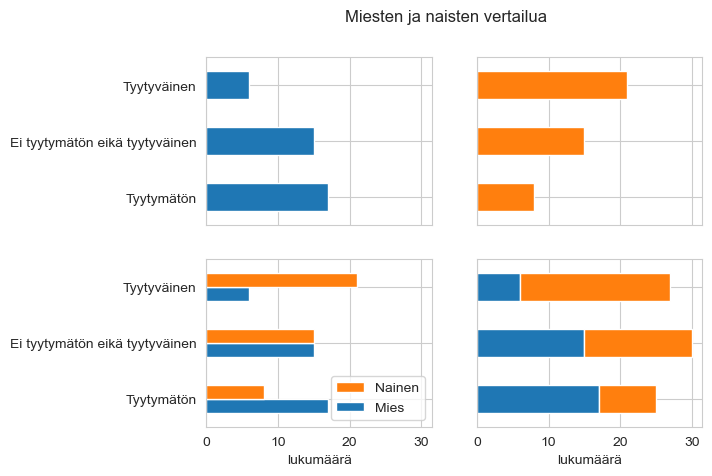

In [12]:
# 2x2 kaaviomatriisi
# sharex- ja sharey-lisäparametreilla asetan kaavioille yhteiset akselit
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle('Miesten ja naisten vertailua', fontsize=12)    # Kuvion (figure) otsikko

df3['Mies'].plot(kind='barh', ax=axs[0, 0])    # Vasemman yläkulman kaavio
df3['Nainen'].plot(kind='barh', ax=axs[0, 1], color='C1')    # Oikean yläkulman kaavio; värinä väripaletin toinen väri (C1)
df3.plot(kind='barh', ax=axs[1, 0], legend='reverse', xlabel='lukumäärä')    # Vasemman alakulman kaavio
df3.plot(kind='barh', ax=axs[1, 1], legend=False, xlabel='lukumäärä', stacked=True)    # Oikean alakulman kaavio

fig.savefig('testi2.png', bbox_inches='tight')

## Lisätietoa

Osaat paljon enemmän, jos käyt läpi kahdeksanosaisen muistio-sarjani matplotlibin perusteista. Aloita tästä:

https://nbviewer.jupyter.org/github/taanila/kaaviot/blob/master/matplotlib1.ipynb